In [1]:
using CSV
using DataFrames
appl = DataFrame(CSV.File("data/aapl.csv"))

,Date,Open,High,Low,Close,Adj Close,Volume
,String15,Float64,Float64,Float64,Float64,Float64,Int64
1,3/22/2017,34.9625,35.4,34.94,35.355,33.3808,103440800
2,3/23/2017,35.315,35.395,35.1525,35.23,33.2628,81385200
3,3/24/2017,35.375,35.435,35.0875,35.16,33.1967,89582400
4,3/27/2017,34.8475,35.305,34.655,35.22,33.2533,94300400
5,3/28/2017,35.2275,36.01,35.155,35.95,33.9426,133499200
6,3/29/2017,35.92,36.1225,35.7975,36.03,34.0181,116760000
7,3/30/2017,36.0475,36.125,35.875,35.9825,33.9732,84829200
8,3/31/2017,35.93,36.0675,35.7525,35.915,33.9095,78646800
9,4/3/2017,35.9275,36.03,35.7625,35.925,33.9189,79942800


In [2]:
###Interpolate for day 31

###SOLVE RECRUSIVELY
#Call oslver which loops back through x days
#BREAK AT 1
function solver1(info,back)
    prev = 0.0
    if(size(info)[1]!=1)
        prev = solver(info[2:size(info)[1]],back+=1)
    else
        return info[1]
    end
    return (exp(-back)*info[1,1])+(exp(-back)*info[1,1])+prev
end
println("At 1262 / 3/22: ", solver1(appl[1:1259,6],0)-35.355)


At 1262 / 3/22: 168.83612228229995


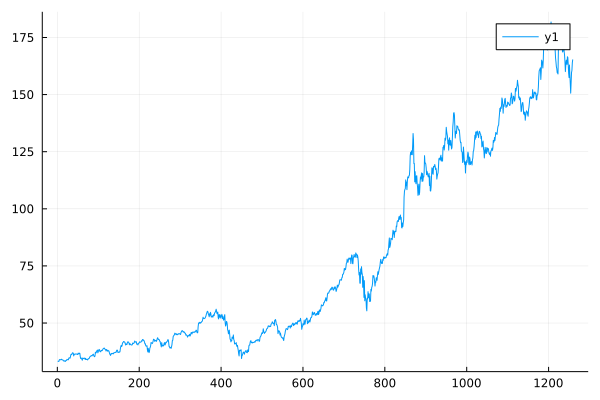

In [8]:
using Plots
plot([1:1259],appl[:,6])

In [60]:
###Interpolate for day 31

###SOLVE RECRUSIVELY
#Call oslver which loops back through x days
#BREAK AT 1
errs = []
function solver2(info,back)
    #println(back)
    prev = 0.0
    if(size(info)[1]!=1)
        prev = solver(info[1:size(info)[1]-1],back+=1)
    else
        return info[1]
    end
    return (exp(-back)*info[size(info)[1],1])+(exp(-back)*(abs(prev-info[size(info)[1]-1,1])))+prev
end
println("At 1262 / 3/22: ", solver2(appl[1:1259,6],0))

At 1262 / 3/22: 179.14270883659674


In [63]:
#farthest back is largest number, i.e. 0th index is end of range-1
for i in 1:1259
   pred = solver(appl[1:i,6],0)
   pushfirst!(errs,pred-appl[i,6])
end

In [64]:
function fixedsolver(info,back)
    #println(back)
    prev = 0.0
    if(size(info)[1]!=1)
        prev = solver(info[1:size(info)[1]-1],back+=1)
    else
        return info[1]
    end
    return (exp(-back)*info[size(info)[1],1])+((1/back)*(errs[back]))+prev
end
println("At 1262 / 3/22: ", fixedsolver(appl[1:1258,6],0))

At 1262 / 3/22: 164.85953223945515
